**Nama : Wilianto, S.T., S.Pd., M.M, M.T.I.**

>Dataset : "Animals Classification Data"\
>Sumber : Kaggle\
>Dataset yang dipakai : ANIMALS dengan 10 species yang dikompres ke ANIMALS_10.zip\
>Link Dataset : https://www.kaggle.com/jerrinbright/cheetahtigerwolf\

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving ANIMALS_10.zip to ANIMALS_10.zip


In [1]:
# Mengimpor semua library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications, optimizers
import pandas as pd
import zipfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
# unzip
!mkdir animals
!unzip ANIMALS_10.zip -d animals
!ls animals

Streaming output truncated to the last 5000 lines.
  inflating: animals/ANIMALS/GIRAFFE/images72.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images720.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images73.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images74.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images75.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images76.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images77.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images78.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images79.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images8.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images80.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images81.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images82.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images83.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images84.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images85.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images86.jpg  
  inflating: animals/ANIMALS/GIRAFFE/images87.jpg  
  inflating: 

# Extract Data
Extract and save data locally in /tmp folder

In [3]:
animals = os.path.join('/content/animals/ANIMALS')

print(os.listdir(animals))

['CHEETAH', 'WOLF', 'CROCODILES', 'RHINO', 'TIGER', 'GIRAFFE', 'LION', 'PANDA', 'ELEPHANT', 'ZEBRA']


In [4]:
ignore_animals = ['ELEPHANT', 'GIRAFFE', 'PANDA', 'RHINO', 'ZEBRA', 'CROCODILES']

for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [5]:
list_animals = os.listdir(animals)
print(list_animals)

['CHEETAH', 'WOLF', 'TIGER', 'LION']


In [6]:
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

CHEETAH: 829
- (300, 168)
- (318, 159)
- (300, 168)
- (300, 168)
---------------
WOLF: 905
- (2000, 1252)
- (263, 191)
- (272, 185)
- (275, 183)
---------------
TIGER: 721
- (300, 168)
- (294, 171)
- (275, 183)
- (244, 207)
---------------
LION: 806
- (300, 168)
- (1400, 845)
- (275, 183)
- (1024, 576)
---------------

Total : 3261


<function matplotlib.pyplot.show>

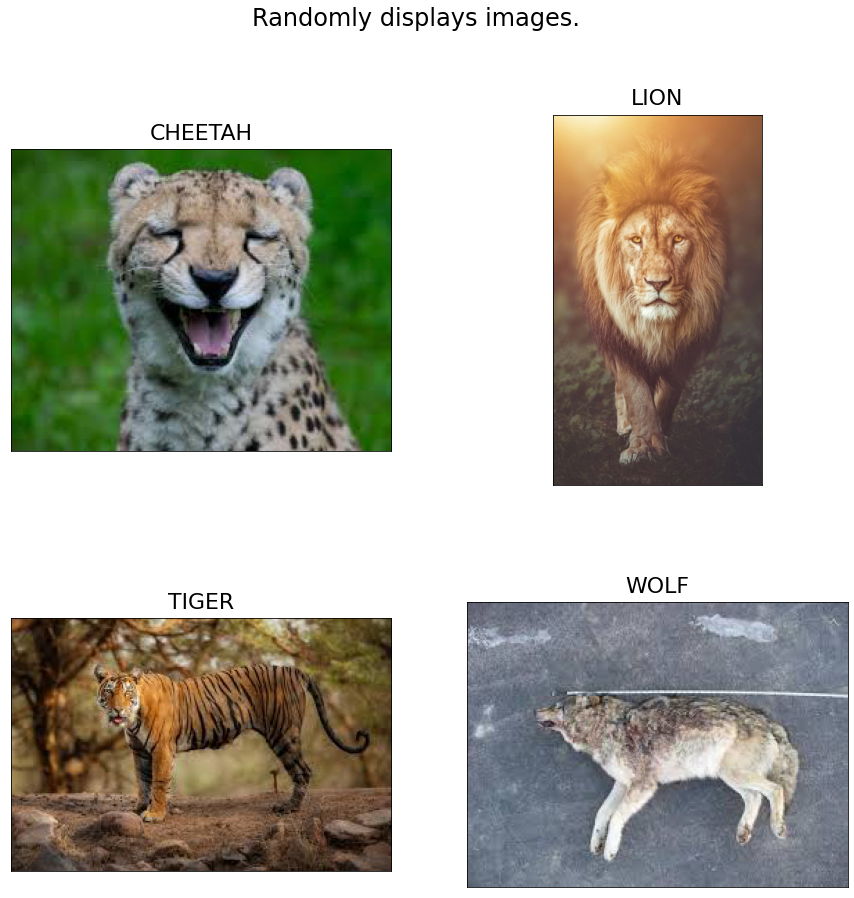

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=24)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id] 
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    animals, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2610 images belonging to 4 classes.
Found 651 images belonging to 4 classes.


In [12]:
tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.82 and logs.get('val_accuracy')>0.82):
      print("\nAccuracy above 82%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
history = model.fit(data_train, 
                    epochs = 100, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/100
10/10 [==============================] - 188s 18s/step - loss: 1.3490 - accuracy: 0.3403 - val_loss: 1.3388 - val_accuracy: 0.4395
Epoch 2/100
10/10 [==============================] - 169s 17s/step - loss: 1.2907 - accuracy: 0.4112 - val_loss: 1.2192 - val_accuracy: 0.4727
Epoch 3/100
10/10 [==============================] - 186s 19s/step - loss: 1.2474 - accuracy: 0.4312 - val_loss: 1.1475 - val_accuracy: 0.4766
Epoch 4/100
10/10 [==============================] - 177s 18s/step - loss: 1.1954 - accuracy: 0.4703 - val_loss: 1.0644 - val_accuracy: 0.5762
Epoch 5/100
10/10 [==============================] - 186s 19s/step - loss: 1.1869 - accuracy: 0.5034 - val_loss: 1.0667 - val_accuracy: 0.5898
Epoch 6/100
10/10 [==============================] - 169s 17s/step - loss: 1.1292 - accuracy: 0.5272 - val_loss: 1.2677 - val_accuracy: 0.4453
Epoch 7/100
10/10 [==============================] - 175s 18s/step - loss: 1.1500 - accuracy: 0.5225 - val_loss: 1.0578 - val_accuracy: 0.5664

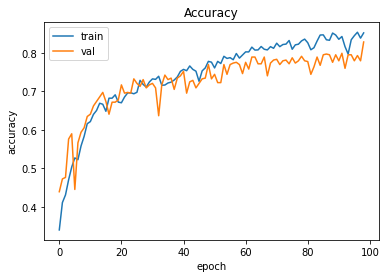

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

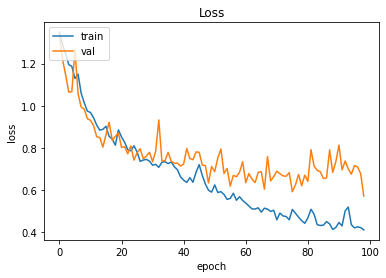

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqlmorh97/assets


In [18]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900204 Dec 18 13:04 model.tflite
